In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import glob
import imageio
import os

# import the necessary packagesf
import imutils
from imutils import contours 
from skimage import measure
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

from utills import detect_pointIllum, save_image, save_patches, extract_patches, extract_patchSums
from utills import detect_pointIllum, save_image, save_patches, extract_patches, extract_patchSums

# Load Data

In [2]:
folder_path = 'data/PA_PPP/whites/5-cross/0409'
tot_n_scan = 10 # tot num of scan = n_scan * n_fold
n_fold = 5

data_ceramic_list = []
data_egg_list = []
data_fabric_cotton_list = []
data_fabric_PET_list = []
data_foam_list = []
data_milk_list = []
data_paper_copy_list = []
data_paper_glossy_list = []
data_paper_toilet_list = []
data_plastic_list = []
data_rubber_list = []
data_wetwipe_list = []

for i in range(tot_n_scan):
    if i < n_fold:
        data_ceramic_list.append(np.load(os.path.join(folder_path, 'ceramic/data_ceramic1_{}.npy'.format(i+1))))
        data_egg_list.append(np.load(os.path.join(folder_path, 'egg/data_egg1_{}.npy'.format(i+1))))
        data_fabric_cotton_list.append(np.load(os.path.join(folder_path, 'fabric_cotton/data_fabric_cotton1_{}.npy'.format(i+1))))
        data_fabric_PET_list.append(np.load(os.path.join(folder_path, 'fabric_PET/data_fabric_PET1_{}.npy'.format(i+1))))
        data_foam_list.append(np.load(os.path.join(folder_path, 'foam/data_foam1_{}.npy'.format(i+1))))
        data_milk_list.append(np.load(os.path.join(folder_path, 'milk/data_milk1_{}.npy'.format(i+1))))
        data_paper_copy_list.append(np.load(os.path.join(folder_path, 'paper_copy/data_paper_copy1_{}.npy'.format(i+1))))
        data_paper_glossy_list.append(np.load(os.path.join(folder_path, 'paper_glossy/data_paper_glossy1_{}.npy'.format(i+1))))
        data_paper_toilet_list.append(np.load(os.path.join(folder_path, 'paper_toilet/data_paper_toilet1_{}.npy'.format(i+1))))
        data_plastic_list.append(np.load(os.path.join(folder_path, 'plastic/data_plastic1_{}.npy'.format(i+1))))
        data_rubber_list.append(np.load(os.path.join(folder_path, 'rubber/data_rubber1_{}.npy'.format(i+1))))
        data_wetwipe_list.append(np.load(os.path.join(folder_path, 'wetwipe/data_wetwipe1_{}.npy'.format(i+1))))
    else:
        data_ceramic_list.append(np.load(os.path.join(folder_path, 'ceramic/data_ceramic2_{}.npy'.format(i+1-n_fold))))
        data_egg_list.append(np.load(os.path.join(folder_path, 'egg/data_egg2_{}.npy'.format(i+1-n_fold))))
        data_fabric_cotton_list.append(np.load(os.path.join(folder_path, 'fabric_cotton/data_fabric_cotton2_{}.npy'.format(i+1-n_fold))))
        data_fabric_PET_list.append(np.load(os.path.join(folder_path, 'fabric_PET/data_fabric_PET2_{}.npy'.format(i+1-n_fold))))
        data_foam_list.append(np.load(os.path.join(folder_path, 'foam/data_foam2_{}.npy'.format(i+1-n_fold))))
        data_milk_list.append(np.load(os.path.join(folder_path, 'milk/data_milk2_{}.npy'.format(i+1-n_fold))))
        data_paper_copy_list.append(np.load(os.path.join(folder_path, 'paper_copy/data_paper_copy2_{}.npy'.format(i+1-n_fold))))
        data_paper_glossy_list.append(np.load(os.path.join(folder_path, 'paper_glossy/data_paper_glossy2_{}.npy'.format(i+1-n_fold))))
        data_paper_toilet_list.append(np.load(os.path.join(folder_path, 'paper_toilet/data_paper_toilet2_{}.npy'.format(i+1-n_fold))))
        data_plastic_list.append(np.load(os.path.join(folder_path, 'plastic/data_plastic2_{}.npy'.format(i+1-n_fold))))
        data_rubber_list.append(np.load(os.path.join(folder_path, 'rubber/data_rubber2_{}.npy'.format(i+1-n_fold))))
        data_wetwipe_list.append(np.load(os.path.join(folder_path, 'wetwipe/data_wetwipe2_{}.npy'.format(i+1-n_fold))))

data_tot_ceramic = np.vstack(data_ceramic_list)
data_tot_egg = np.vstack(data_egg_list)
data_tot_fabric_cotton = np.vstack(data_fabric_cotton_list)
data_tot_fabric_PET = np.vstack(data_fabric_PET_list)
data_tot_foam_list = np.vstack(data_foam_list)
data_tot_milk = np.vstack(data_milk_list)
data_tot_paper_copy = np.vstack(data_paper_copy_list)
data_tot_paper_glossy = np.vstack(data_paper_glossy_list)
data_tot_paper_toilet = np.vstack(data_paper_toilet_list)
data_tot_plastic = np.vstack(data_plastic_list)
data_tot_rubber = np.vstack(data_rubber_list)
data_tot_wetwipe = np.vstack(data_wetwipe_list)

(8887, 14400)


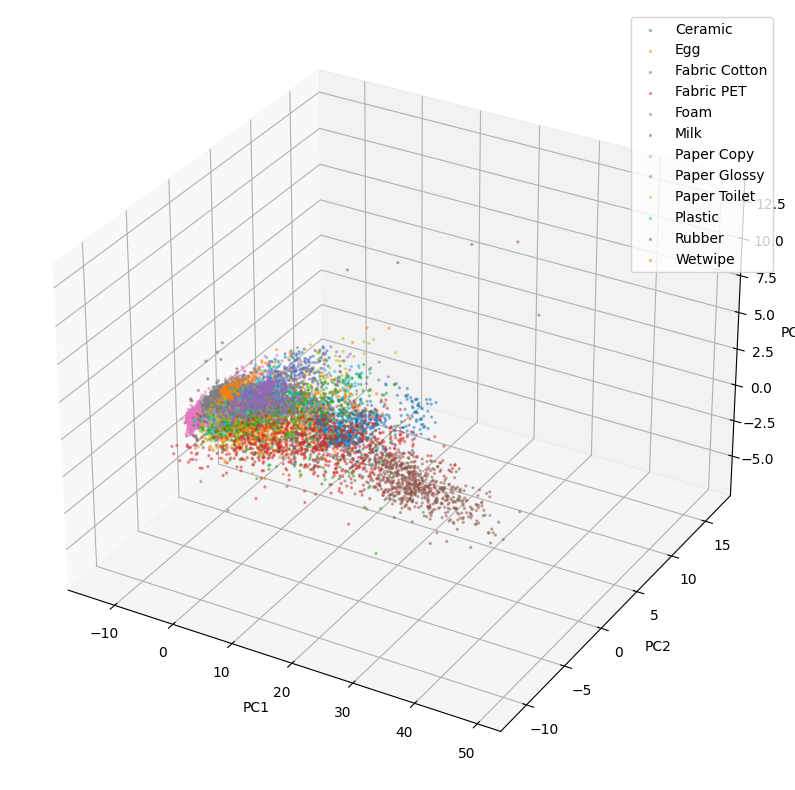

In [3]:
from sklearn import decomposition

data_list = [data_tot_ceramic, data_tot_egg, data_tot_fabric_cotton, data_tot_fabric_PET, data_tot_foam_list, data_tot_milk,
             data_tot_paper_copy, data_tot_paper_glossy, data_tot_paper_toilet, data_tot_plastic, data_tot_rubber, data_tot_wetwipe]
class_names = ["Ceramic", "Egg", "Fabric Cotton", "Fabric PET", "Foam", "Milk", "Paper Copy", "Paper Glossy", "Paper Toilet", "Plastic", "Rubber", "Wetwipe"]

tot_data = np.vstack(data_list)
print(tot_data.shape)

x = tot_data
pca = decomposition.PCA(n_components=3)
x_std = x
# x_std = StandardScaler().fit_transform(x)
transformed_data = pca.fit_transform(x_std)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(data_list)):
    ax.scatter(transformed_data[:len(data_list[i]), 0], transformed_data[:len(data_list[i]), 1], transformed_data[:len(data_list[i]), 2], label=class_names[i], s=2, alpha=0.4)
    transformed_data = transformed_data[len(data_list[i]):]

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# ax.set_xlim(-2, 2)
# ax.set_ylim(-3, 3)
# ax.set_zlim(-1, 1)

ax.legend()
plt.show()

In [4]:
patchSum_data_ceramic_list = [] 
patchSum_data_egg_list = []
patchSum_data_fabric_cotton_list = []
patchSum_data_fabric_PET_list = []
patchSum_data_foam_list = []
patchSum_data_milk_list = []
patchSum_data_paper_copy_list = []
patchSum_data_paper_glossy_list = []
patchSum_data_paper_toilet_list = []
patchSum_data_plastic_list = []
patchSum_data_rubber_list = []
patchSum_data_wetwipe_list = []

for i in range(tot_n_scan):
    if i < n_fold:
        patchSum_data_ceramic_list.append(np.load(os.path.join(folder_path, 'ceramic/patchSum_data_ceramic1_{}.npy'.format(i+1))))
        patchSum_data_egg_list.append(np.load(os.path.join(folder_path, 'egg/patchSum_data_egg1_{}.npy'.format(i+1))))
        patchSum_data_fabric_cotton_list.append(np.load(os.path.join(folder_path, 'fabric_cotton/patchSum_data_fabric_cotton1_{}.npy'.format(i+1))))
        patchSum_data_fabric_PET_list.append(np.load(os.path.join(folder_path, 'fabric_PET/patchSum_data_fabric_PET1_{}.npy'.format(i+1))))
        patchSum_data_foam_list.append(np.load(os.path.join(folder_path, 'foam/patchSum_data_foam1_{}.npy'.format(i+1))))
        patchSum_data_milk_list.append(np.load(os.path.join(folder_path, 'milk/patchSum_data_milk1_{}.npy'.format(i+1))))
        patchSum_data_paper_copy_list.append(np.load(os.path.join(folder_path, 'paper_copy/patchSum_data_paper_copy1_{}.npy'.format(i+1))))
        patchSum_data_paper_glossy_list.append(np.load(os.path.join(folder_path, 'paper_glossy/patchSum_data_paper_glossy1_{}.npy'.format(i+1))))
        patchSum_data_paper_toilet_list.append(np.load(os.path.join(folder_path, 'paper_toilet/patchSum_data_paper_toilet1_{}.npy'.format(i+1))))
        patchSum_data_plastic_list.append(np.load(os.path.join(folder_path, 'plastic/patchSum_data_plastic1_{}.npy'.format(i+1))))
        patchSum_data_rubber_list.append(np.load(os.path.join(folder_path, 'rubber/patchSum_data_rubber1_{}.npy'.format(i+1))))
        patchSum_data_wetwipe_list.append(np.load(os.path.join(folder_path, 'wetwipe/patchSum_data_wetwipe1_{}.npy'.format(i+1))))
    else:
        patchSum_data_ceramic_list.append(np.load(os.path.join(folder_path, 'ceramic/patchSum_data_ceramic2_{}.npy'.format(i+1-n_fold))))
        patchSum_data_egg_list.append(np.load(os.path.join(folder_path, 'egg/patchSum_data_egg2_{}.npy'.format(i+1-n_fold))))
        patchSum_data_fabric_cotton_list.append(np.load(os.path.join(folder_path, 'fabric_cotton/patchSum_data_fabric_cotton2_{}.npy'.format(i+1-n_fold))))
        patchSum_data_fabric_PET_list.append(np.load(os.path.join(folder_path, 'fabric_PET/patchSum_data_fabric_PET2_{}.npy'.format(i+1-n_fold))))
        patchSum_data_foam_list.append(np.load(os.path.join(folder_path, 'foam/patchSum_data_foam2_{}.npy'.format(i+1-n_fold))))
        patchSum_data_milk_list.append(np.load(os.path.join(folder_path, 'milk/patchSum_data_milk2_{}.npy'.format(i+1-n_fold))))
        patchSum_data_paper_copy_list.append(np.load(os.path.join(folder_path, 'paper_copy/patchSum_data_paper_copy2_{}.npy'.format(i+1-n_fold))))
        patchSum_data_paper_glossy_list.append(np.load(os.path.join(folder_path, 'paper_glossy/patchSum_data_paper_glossy2_{}.npy'.format(i+1-n_fold))))
        patchSum_data_paper_toilet_list.append(np.load(os.path.join(folder_path, 'paper_toilet/patchSum_data_paper_toilet2_{}.npy'.format(i+1-n_fold))))
        patchSum_data_plastic_list.append(np.load(os.path.join(folder_path, 'plastic/patchSum_data_plastic2_{}.npy'.format(i+1-n_fold))))
        patchSum_data_rubber_list.append(np.load(os.path.join(folder_path, 'rubber/patchSum_data_rubber2_{}.npy'.format(i+1-n_fold))))
        patchSum_data_wetwipe_list.append(np.load(os.path.join(folder_path, 'wetwipe/patchSum_data_wetwipe2_{}.npy'.format(i+1-n_fold))))

patchSum_data_tot_ceramic = np.vstack(patchSum_data_ceramic_list)
patchSum_data_tot_egg = np.vstack(patchSum_data_egg_list)
patchSum_data_tot_fabric_cotton = np.vstack(patchSum_data_fabric_cotton_list)
patchSum_data_tot_fabric_PET = np.vstack(patchSum_data_fabric_PET_list)
patchSum_data_tot_foam = np.vstack(patchSum_data_foam_list)
patchSum_data_tot_milk = np.vstack(patchSum_data_milk_list)
patchSum_data_tot_paper_copy = np.vstack(patchSum_data_paper_copy_list)
patchSum_data_tot_paper_glossy = np.vstack(patchSum_data_paper_glossy_list)
patchSum_data_tot_paper_toilet = np.vstack(patchSum_data_paper_toilet_list)
patchSum_data_tot_plastic = np.vstack(patchSum_data_plastic_list)
patchSum_data_tot_rubber = np.vstack(patchSum_data_rubber_list)
patchSum_data_tot_wetwipe = np.vstack(patchSum_data_wetwipe_list)

(8887, 16)


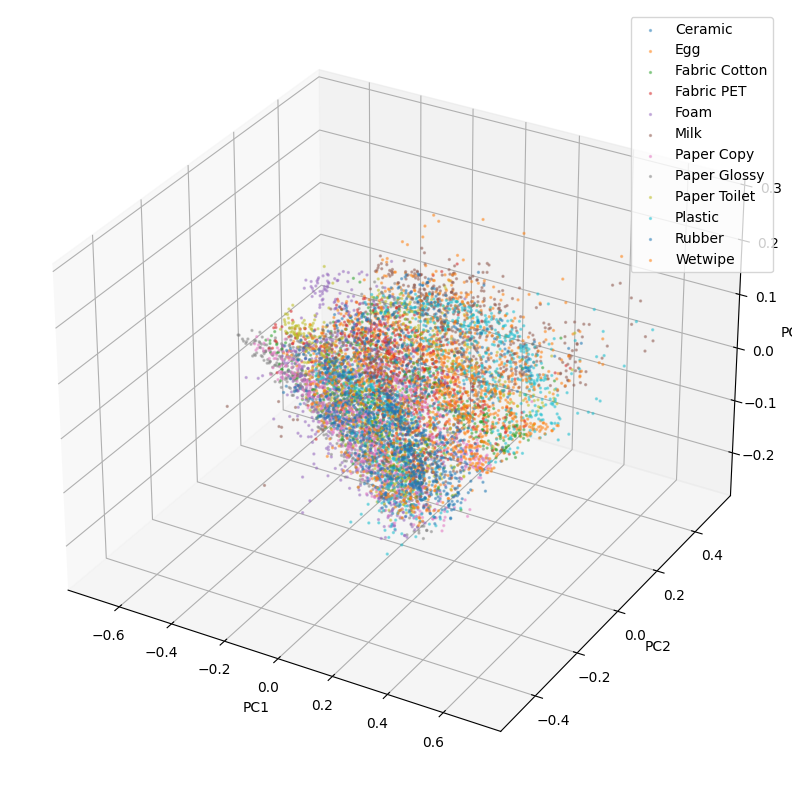

In [5]:
from sklearn import decomposition

data_list = [patchSum_data_tot_ceramic, patchSum_data_tot_egg, patchSum_data_tot_fabric_cotton, patchSum_data_tot_fabric_PET, patchSum_data_tot_foam, patchSum_data_tot_milk, 
             patchSum_data_tot_paper_copy, patchSum_data_tot_paper_glossy, patchSum_data_tot_paper_toilet, patchSum_data_tot_plastic, patchSum_data_tot_rubber, patchSum_data_tot_wetwipe]
class_names = ["Ceramic", "Egg", "Fabric Cotton", "Fabric PET", "Foam", "Milk", "Paper Copy", "Paper Glossy", "Paper Toilet", "Plastic", "Rubber", "Wetwipe"]
tot_data = np.vstack(data_list)
print(tot_data.shape)

x = tot_data
pca = decomposition.PCA(n_components=3)
x_std = x
# x_std = StandardScaler().fit_transform(x)
transformed_data = pca.fit_transform(x_std)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(data_list)):
    ax.scatter(transformed_data[:len(data_list[i]), 0], transformed_data[:len(data_list[i]), 1], transformed_data[:len(data_list[i]), 2], label=class_names[i], s=2, alpha=0.4)
    transformed_data = transformed_data[len(data_list[i]):]

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# ax.set_xlim(-2, 2)
# ax.set_ylim(-3, 3)
# ax.set_zlim(-1, 1)

ax.legend()
plt.show()

In [6]:
pixelSum_data_ceramic_list = []
pixelSum_data_egg_list = []
pixelSum_data_fabric_cotton_list = []
pixelSum_data_fabric_PET_list = []
pixelSum_data_foam_list = []
pixelSum_data_milk_list = []
pixelSum_data_paper_copy_list = []
pixelSum_data_paper_glossy_list = []
pixelSum_data_paper_toilet_list = []
pixelSum_data_plastic_list = []
pixelSum_data_rubber_list = []
pixelSum_data_wetwipe_list = []

for i in range(tot_n_scan):
    if i < n_fold:
        pixelSum_data_ceramic_list.append(np.load(os.path.join(folder_path, 'ceramic/pixelSum_data_ceramic1_{}.npy'.format(i+1))))
        pixelSum_data_egg_list.append(np.load(os.path.join(folder_path, 'egg/pixelSum_data_egg1_{}.npy'.format(i+1))))
        pixelSum_data_fabric_cotton_list.append(np.load(os.path.join(folder_path, 'fabric_cotton/pixelSum_data_fabric_cotton1_{}.npy'.format(i+1))))
        pixelSum_data_fabric_PET_list.append(np.load(os.path.join(folder_path, 'fabric_PET/pixelSum_data_fabric_PET1_{}.npy'.format(i+1))))
        pixelSum_data_foam_list.append(np.load(os.path.join(folder_path, 'foam/pixelSum_data_foam1_{}.npy'.format(i+1))))
        pixelSum_data_milk_list.append(np.load(os.path.join(folder_path, 'milk/pixelSum_data_milk1_{}.npy'.format(i+1))))
        pixelSum_data_paper_copy_list.append(np.load(os.path.join(folder_path, 'paper_copy/pixelSum_data_paper_copy1_{}.npy'.format(i+1))))
        pixelSum_data_paper_glossy_list.append(np.load(os.path.join(folder_path, 'paper_glossy/pixelSum_data_paper_glossy1_{}.npy'.format(i+1))))
        pixelSum_data_paper_toilet_list.append(np.load(os.path.join(folder_path, 'paper_toilet/pixelSum_data_paper_toilet1_{}.npy'.format(i+1))))
        pixelSum_data_plastic_list.append(np.load(os.path.join(folder_path, 'plastic/pixelSum_data_plastic1_{}.npy'.format(i+1))))
        pixelSum_data_rubber_list.append(np.load(os.path.join(folder_path, 'rubber/pixelSum_data_rubber1_{}.npy'.format(i+1))))
        pixelSum_data_wetwipe_list.append(np.load(os.path.join(folder_path, 'wetwipe/pixelSum_data_wetwipe1_{}.npy'.format(i+1))))
    else:
        pixelSum_data_ceramic_list.append(np.load(os.path.join(folder_path, 'ceramic/pixelSum_data_ceramic2_{}.npy'.format(i+1-n_fold))))
        pixelSum_data_egg_list.append(np.load(os.path.join(folder_path, 'egg/pixelSum_data_egg2_{}.npy'.format(i+1-n_fold))))
        pixelSum_data_fabric_cotton_list.append(np.load(os.path.join(folder_path, 'fabric_cotton/pixelSum_data_fabric_cotton2_{}.npy'.format(i+1-n_fold))))
        pixelSum_data_fabric_PET_list.append(np.load(os.path.join(folder_path, 'fabric_PET/pixelSum_data_fabric_PET2_{}.npy'.format(i+1-n_fold))))
        pixelSum_data_foam_list.append(np.load(os.path.join(folder_path, 'foam/pixelSum_data_foam2_{}.npy'.format(i+1-n_fold))))
        pixelSum_data_milk_list.append(np.load(os.path.join(folder_path, 'milk/pixelSum_data_milk2_{}.npy'.format(i+1-n_fold))))
        pixelSum_data_paper_copy_list.append(np.load(os.path.join(folder_path, 'paper_copy/pixelSum_data_paper_copy2_{}.npy'.format(i+1-n_fold))))
        pixelSum_data_paper_glossy_list.append(np.load(os.path.join(folder_path, 'paper_glossy/pixelSum_data_paper_glossy2_{}.npy'.format(i+1-n_fold))))
        pixelSum_data_paper_toilet_list.append(np.load(os.path.join(folder_path, 'paper_toilet/pixelSum_data_paper_toilet2_{}.npy'.format(i+1-n_fold))))
        pixelSum_data_plastic_list.append(np.load(os.path.join(folder_path, 'plastic/pixelSum_data_plastic2_{}.npy'.format(i+1-n_fold))))
        pixelSum_data_rubber_list.append(np.load(os.path.join(folder_path, 'rubber/pixelSum_data_rubber2_{}.npy'.format(i+1-n_fold))))
        pixelSum_data_wetwipe_list.append(np.load(os.path.join(folder_path, 'wetwipe/pixelSum_data_wetwipe2_{}.npy'.format(i+1-n_fold))))

pixelSum_data_tot_ceramic = np.vstack(pixelSum_data_ceramic_list)
pixelSum_data_tot_egg = np.vstack(pixelSum_data_egg_list)
pixelSum_data_tot_fabric_cotton = np.vstack(pixelSum_data_fabric_cotton_list)
pixelSum_data_tot_fabric_PET = np.vstack(pixelSum_data_fabric_PET_list)
pixelSum_data_tot_foam = np.vstack(pixelSum_data_foam_list)
pixelSum_data_tot_milk = np.vstack(pixelSum_data_milk_list)
pixelSum_data_tot_paper_copy = np.vstack(pixelSum_data_paper_copy_list)
pixelSum_data_tot_paper_glossy = np.vstack(pixelSum_data_paper_glossy_list)
pixelSum_data_tot_paper_toilet = np.vstack(pixelSum_data_paper_toilet_list)
pixelSum_data_tot_plastic = np.vstack(pixelSum_data_plastic_list)
pixelSum_data_tot_rubber = np.vstack(pixelSum_data_rubber_list)
pixelSum_data_tot_wetwipe = np.vstack(pixelSum_data_wetwipe_list)


(8887, 900)


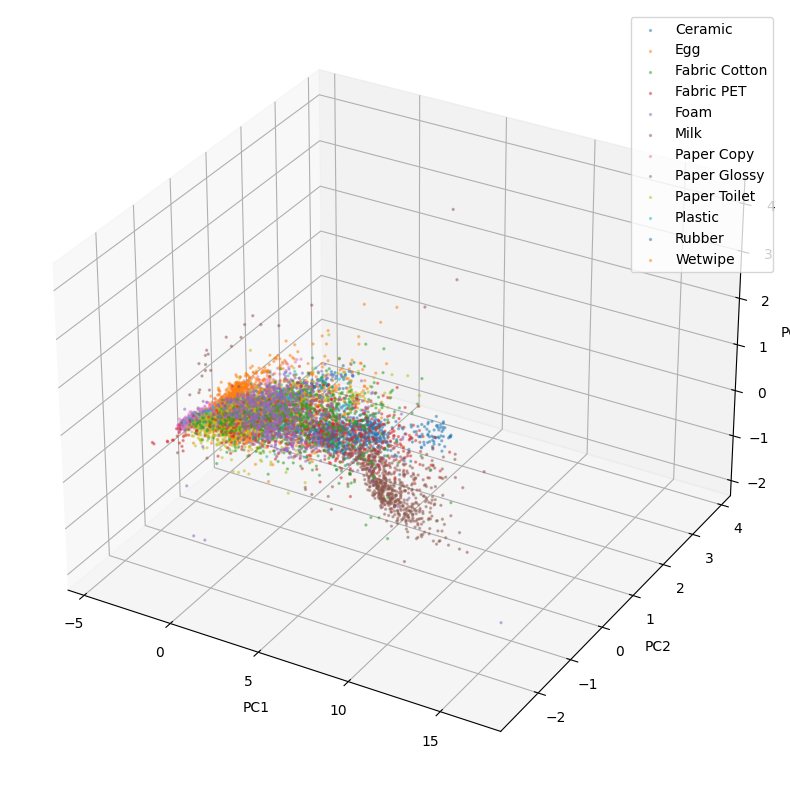

In [7]:
from sklearn import decomposition

# data_list = [pixelSum_data_tot_ceramic, pixelSum_data_tot_foam, pixelSum_data_tot_paper_copy, pixelSum_data_tot_PET, pixelSum_data_tot_plastic]
# class_names = ["Ceramic", "Foam", "Paper Copy", "PET", "Plastic"]

data_list = [pixelSum_data_tot_ceramic, pixelSum_data_tot_egg, pixelSum_data_tot_fabric_cotton, pixelSum_data_tot_fabric_PET, pixelSum_data_tot_foam, pixelSum_data_tot_milk,
             pixelSum_data_tot_paper_copy, pixelSum_data_tot_paper_glossy, pixelSum_data_tot_paper_toilet, pixelSum_data_tot_plastic, pixelSum_data_tot_rubber, pixelSum_data_tot_wetwipe]
class_names = ["Ceramic", "Egg", "Fabric Cotton", "Fabric PET", "Foam", "Milk", "Paper Copy", "Paper Glossy", "Paper Toilet", "Plastic", "Rubber", "Wetwipe"]

tot_data = np.vstack(data_list)
print(tot_data.shape)

x = tot_data
pca = decomposition.PCA(n_components=3)
x_std = x
# x_std = StandardScaler().fit_transform(x)
transformed_data = pca.fit_transform(x_std)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(data_list)):
    ax.scatter(transformed_data[:len(data_list[i]), 0], transformed_data[:len(data_list[i]), 1], transformed_data[:len(data_list[i]), 2], label=class_names[i], s=2, alpha=0.4)
    transformed_data = transformed_data[len(data_list[i]):]

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# ax.set_xlim(-2, 2)
# ax.set_ylim(-3, 3)
# ax.set_zlim(-1, 1)

ax.legend()
plt.show()

## ESnorm

In [8]:
folder_path = 'data/PA_PPP/whites/5-cross/0409'
tot_n_scan = 10 # tot num of scan = n_scan * n_fold
n_fold = 5

# Replace the original data lists with the ESnorm data lists
ESnorm_data_ceramic_list = []
ESnorm_data_egg_list = []
ESnorm_data_fabric_cotton_list = []
ESnorm_data_fabric_PET_list = []
ESnorm_data_foam_list = []
ESnorm_data_milk_list = []
ESnorm_data_paper_copy_list = []
ESnorm_data_paper_glossy_list = []
ESnorm_data_paper_toilet_list = []
ESnorm_data_plastic_list = []
ESnorm_data_rubber_list = []
ESnorm_data_wetwipe_list = []

for i in range(tot_n_scan):
    if i < n_fold:
        ESnorm_data_ceramic_list.append(np.load(os.path.join(folder_path, 'ceramic/ESnorm_data_ceramic1_{}.npy'.format(i+1))))
        ESnorm_data_egg_list.append(np.load(os.path.join(folder_path, 'egg/ESnorm_data_egg1_{}.npy'.format(i+1))))
        ESnorm_data_fabric_cotton_list.append(np.load(os.path.join(folder_path, 'fabric_cotton/ESnorm_data_fabric_cotton1_{}.npy'.format(i+1))))
        ESnorm_data_fabric_PET_list.append(np.load(os.path.join(folder_path, 'fabric_PET/ESnorm_data_fabric_PET1_{}.npy'.format(i+1))))
        ESnorm_data_foam_list.append(np.load(os.path.join(folder_path, 'foam/ESnorm_data_foam1_{}.npy'.format(i+1))))
        ESnorm_data_milk_list.append(np.load(os.path.join(folder_path, 'milk/ESnorm_data_milk1_{}.npy'.format(i+1))))
        ESnorm_data_paper_copy_list.append(np.load(os.path.join(folder_path, 'paper_copy/ESnorm_data_paper_copy1_{}.npy'.format(i+1))))
        ESnorm_data_paper_glossy_list.append(np.load(os.path.join(folder_path, 'paper_glossy/ESnorm_data_paper_glossy1_{}.npy'.format(i+1))))
        ESnorm_data_paper_toilet_list.append(np.load(os.path.join(folder_path, 'paper_toilet/ESnorm_data_paper_toilet1_{}.npy'.format(i+1))))
        ESnorm_data_plastic_list.append(np.load(os.path.join(folder_path, 'plastic/ESnorm_data_plastic1_{}.npy'.format(i+1))))
        ESnorm_data_rubber_list.append(np.load(os.path.join(folder_path, 'rubber/ESnorm_data_rubber1_{}.npy'.format(i+1))))
        ESnorm_data_wetwipe_list.append(np.load(os.path.join(folder_path, 'wetwipe/ESnorm_data_wetwipe1_{}.npy'.format(i+1))))
    else:
        ESnorm_data_ceramic_list.append(np.load(os.path.join(folder_path, 'ceramic/ESnorm_data_ceramic2_{}.npy'.format(i+1-n_fold))))
        ESnorm_data_egg_list.append(np.load(os.path.join(folder_path, 'egg/ESnorm_data_egg2_{}.npy'.format(i+1-n_fold))))
        ESnorm_data_fabric_cotton_list.append(np.load(os.path.join(folder_path, 'fabric_cotton/ESnorm_data_fabric_cotton2_{}.npy'.format(i+1-n_fold))))
        ESnorm_data_fabric_PET_list.append(np.load(os.path.join(folder_path, 'fabric_PET/ESnorm_data_fabric_PET2_{}.npy'.format(i+1-n_fold))))
        ESnorm_data_foam_list.append(np.load(os.path.join(folder_path, 'foam/ESnorm_data_foam2_{}.npy'.format(i+1-n_fold))))
        ESnorm_data_milk_list.append(np.load(os.path.join(folder_path, 'milk/ESnorm_data_milk2_{}.npy'.format(i+1-n_fold))))
        ESnorm_data_paper_copy_list.append(np.load(os.path.join(folder_path, 'paper_copy/ESnorm_data_paper_copy2_{}.npy'.format(i+1-n_fold))))
        ESnorm_data_paper_glossy_list.append(np.load(os.path.join(folder_path, 'paper_glossy/ESnorm_data_paper_glossy2_{}.npy'.format(i+1-n_fold))))
        ESnorm_data_paper_toilet_list.append(np.load(os.path.join(folder_path, 'paper_toilet/ESnorm_data_paper_toilet2_{}.npy'.format(i+1-n_fold))))
        ESnorm_data_plastic_list.append(np.load(os.path.join(folder_path, 'plastic/ESnorm_data_plastic2_{}.npy'.format(i+1-n_fold))))
        ESnorm_data_rubber_list.append(np.load(os.path.join(folder_path, 'rubber/ESnorm_data_rubber2_{}.npy'.format(i+1-n_fold))))
        ESnorm_data_wetwipe_list.append(np.load(os.path.join(folder_path, 'wetwipe/ESnorm_data_wetwipe2_{}.npy'.format(i+1-n_fold))))

ESnorm_data_tot_ceramic = np.vstack(ESnorm_data_ceramic_list)
ESnorm_data_tot_egg = np.vstack(ESnorm_data_egg_list)
ESnorm_data_tot_fabric_cotton = np.vstack(ESnorm_data_fabric_cotton_list)
ESnorm_data_tot_fabric_PET = np.vstack(ESnorm_data_fabric_PET_list)
ESnorm_data_tot_foam = np.vstack(ESnorm_data_foam_list)
ESnorm_data_tot_milk = np.vstack(ESnorm_data_milk_list)
ESnorm_data_tot_paper_copy = np.vstack(ESnorm_data_paper_copy_list)
ESnorm_data_tot_paper_glossy = np.vstack(ESnorm_data_paper_glossy_list)
ESnorm_data_tot_paper_toilet = np.vstack(ESnorm_data_paper_toilet_list)
ESnorm_data_tot_plastic = np.vstack(ESnorm_data_plastic_list)
ESnorm_data_tot_rubber = np.vstack(ESnorm_data_rubber_list)
ESnorm_data_tot_wetwipe = np.vstack(ESnorm_data_wetwipe_list)



(8887, 14400)


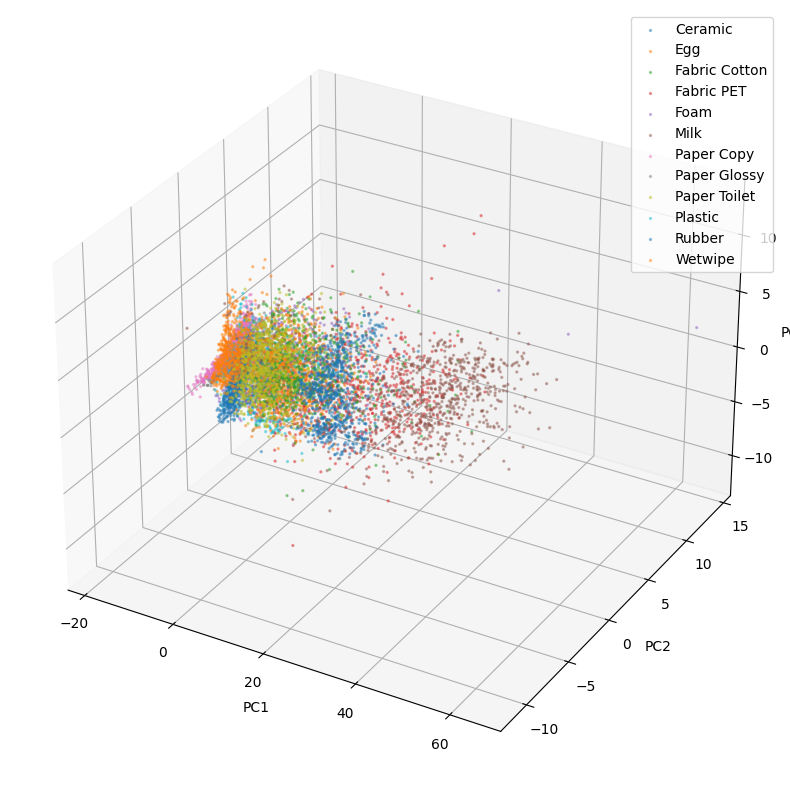

In [9]:
from sklearn import decomposition

data_list = [ESnorm_data_tot_ceramic, ESnorm_data_tot_egg, ESnorm_data_tot_fabric_cotton, ESnorm_data_tot_fabric_PET, ESnorm_data_tot_foam, ESnorm_data_tot_milk, 
             ESnorm_data_tot_paper_copy, ESnorm_data_tot_paper_glossy, ESnorm_data_tot_paper_toilet, ESnorm_data_tot_plastic, ESnorm_data_tot_rubber, ESnorm_data_tot_wetwipe]
class_names = ["Ceramic", "Egg", "Fabric Cotton", "Fabric PET", "Foam", "Milk", "Paper Copy", "Paper Glossy", "Paper Toilet", "Plastic", "Rubber", "Wetwipe"]

tot_data = np.vstack(data_list)
print(tot_data.shape)

x = tot_data
pca = decomposition.PCA(n_components=3)
x_std = x
# x_std = StandardScaler().fit_transform(x)
transformed_data = pca.fit_transform(x_std)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(data_list)):
    ax.scatter(transformed_data[:len(data_list[i]), 0], transformed_data[:len(data_list[i]), 1], transformed_data[:len(data_list[i]), 2], label=class_names[i], s=2, alpha=0.4)
    transformed_data = transformed_data[len(data_list[i]):]

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# ax.set_xlim(-2, 2)
# ax.set_ylim(-3, 3)
# ax.set_zlim(-1, 1)

ax.legend()
plt.show()

# 5-cross validation

## Multispectral Albedo (Sum of patches at each spectrum, patchSum)

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import NuSVC

In [17]:
### Each scan dataset classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Create the LDA model
lda = LinearDiscriminantAnalysis()

# Create the SVM classifier with an RBF kernel and 'nu' parameter set to 0.5
clf = NuSVC(kernel='rbf', nu=0.05)

LDA_accuracy_list = []
LDA_cm_list = []
SVM_accuracy_list = []
SVM_cm_list = []

class_names = ['ceramic', 'egg', 'fabric_cotton', 'fabric_PET', 'foam', 'milk', 'paper_copy', 'paper_glossy', 'paper_toilet', 'plastic', 'rubber', 'wetwipe']
class_data_lists = [patchSum_data_ceramic_list, patchSum_data_egg_list, patchSum_data_fabric_cotton_list, patchSum_data_fabric_PET_list,
                    patchSum_data_foam_list, patchSum_data_milk_list, patchSum_data_paper_copy_list, patchSum_data_paper_glossy_list,
                    patchSum_data_paper_toilet_list, patchSum_data_plastic_list, patchSum_data_rubber_list, patchSum_data_wetwipe_list]

for i in range(5):
    test_indices = [i, i + 5]
    train_indices = [j for j in range(10) if j not in test_indices]

    X_test = np.concatenate([data_list[idx] for data_list in class_data_lists for idx in test_indices])
    y_test = np.concatenate([np.full(data_list[idx].shape[0], class_idx) for class_idx, data_list in enumerate(class_data_lists) for idx in test_indices])

    X_train_list = []
    y_train_list = []

    for class_idx, data_list in enumerate(class_data_lists):
        rest_data = np.vstack([data_list[idx] for idx in train_indices])
        X_train_list.append(rest_data)
        y_train_list.append(np.full(rest_data.shape[0], class_idx))

    X_train = np.concatenate(X_train_list)
    y_train = np.concatenate(y_train_list)

    # Fit the LDA model to the training data
    lda.fit(X_train, y_train)

    # Perform classification on the test data
    predictions = lda.predict(X_test)

    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    LDA_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    LDA_cm_list.append(cm)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Perform classification on the test data
    predictions = clf.predict(X_test)
    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    SVM_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    SVM_cm_list.append(cm)


In [18]:
print("LDA accuracy: ", np.mean(LDA_accuracy_list))
LDA_accuracy_list

LDA accuracy:  0.26335888346260733


[0.2035894559730791,
 0.2922990444069702,
 0.26749435665914223,
 0.3038331454340473,
 0.24957841483979765]

In [19]:
print("SVM accuracy: ", np.mean(SVM_accuracy_list))
SVM_accuracy_list

SVM accuracy:  0.3666941964485283


[0.4722378014582165,
 0.27431141090500283,
 0.38656884875846503,
 0.3855693348365276,
 0.31478358628442943]

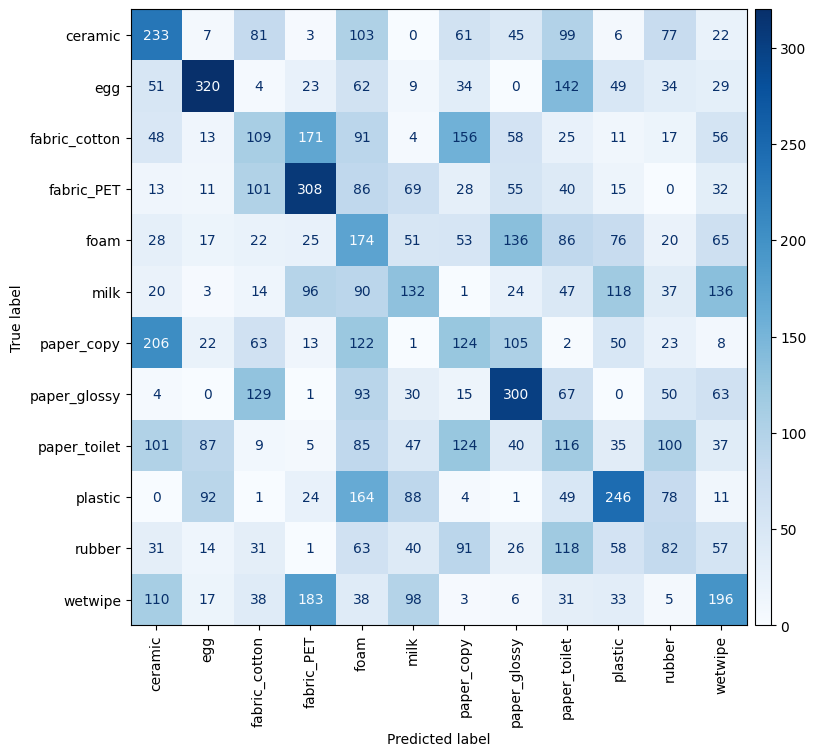

In [21]:
cm = sum(LDA_cm_list)
# cm = SVM_cm_list[2]
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

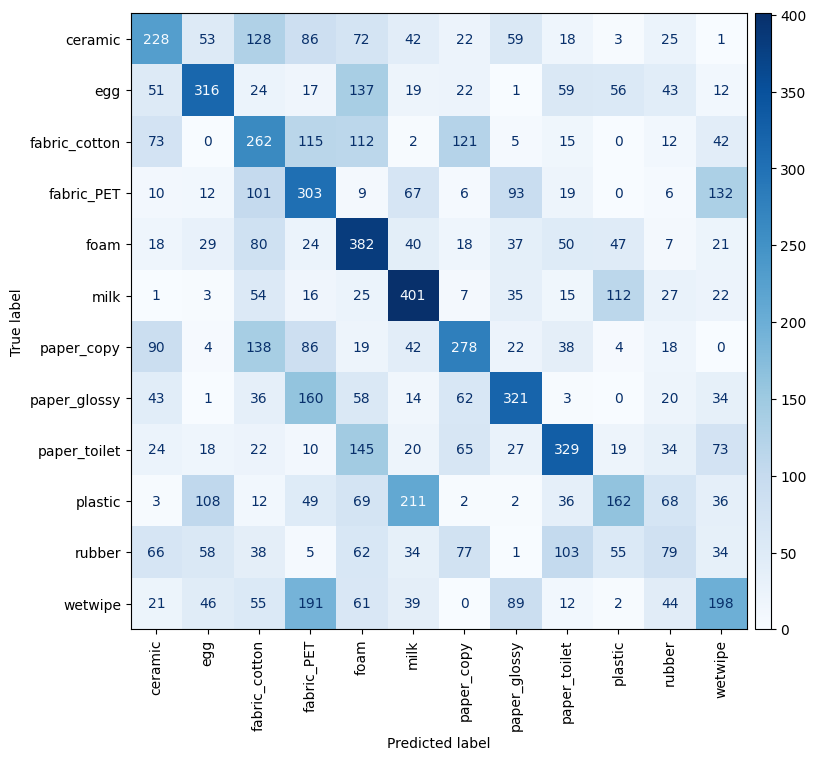

In [23]:
cm = sum(SVM_cm_list)
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

## Achromatic Scattering (Sum of patches (pixels) through spectra)

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Create the LDA model
lda = LinearDiscriminantAnalysis()

# Create the SVM classifier with an RBF kernel and 'nu' parameter set to 0.5
clf = NuSVC(kernel='rbf', nu=0.05)

LDA_accuracy_list = []
LDA_cm_list = []
SVM_accuracy_list = []
SVM_cm_list = []

class_names = ['ceramic', 'egg', 'fabric_cotton', 'fabric_PET', 'foam', 'milk', 'paper_copy', 'paper_glossy', 'paper_toilet', 'plastic', 'rubber', 'wetwipe']
class_data_lists = [pixelSum_data_ceramic_list, pixelSum_data_egg_list, pixelSum_data_fabric_cotton_list, pixelSum_data_fabric_PET_list,
                    pixelSum_data_foam_list, pixelSum_data_milk_list, pixelSum_data_paper_copy_list, pixelSum_data_paper_glossy_list,
                    pixelSum_data_paper_toilet_list, pixelSum_data_plastic_list, pixelSum_data_rubber_list, pixelSum_data_wetwipe_list]

# for i in range(5):
for i in range(5):
    test_indices = [i, i + 5]
    train_indices = [j for j in range(10) if j not in test_indices]

    X_test = np.concatenate([data_list[idx] for data_list in class_data_lists for idx in test_indices])
    y_test = np.concatenate([np.full(data_list[idx].shape[0], class_idx) for class_idx, data_list in enumerate(class_data_lists) for idx in test_indices])

    X_train_list = []
    y_train_list = []

    for class_idx, data_list in enumerate(class_data_lists):
        rest_data = np.vstack([data_list[idx] for idx in train_indices])
        X_train_list.append(rest_data)
        y_train_list.append(np.full(rest_data.shape[0], class_idx))

    X_train = np.concatenate(X_train_list)
    y_train = np.concatenate(y_train_list)

    # Fit the LDA model to the training data
    lda.fit(X_train, y_train)

    # Perform classification on the test data
    predictions = lda.predict(X_test)

    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    LDA_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    LDA_cm_list.append(cm)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Perform classification on the test data
    predictions = clf.predict(X_test)
    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    SVM_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    SVM_cm_list.append(cm)


In [25]:
print("LDA accuracy: ", np.mean(LDA_accuracy_list))
LDA_accuracy_list

LDA accuracy:  0.6094297147415688


[0.6242288278182838,
 0.6750983698707139,
 0.6343115124153499,
 0.5868094701240135,
 0.5267003934794828]

In [26]:
print("SVM accuracy: ", np.mean(SVM_accuracy_list))
SVM_accuracy_list

SVM accuracy:  0.7798869556397295


[0.7818283791362871,
 0.8712759977515458,
 0.7460496613995485,
 0.7998872604284104,
 0.7003934794828556]

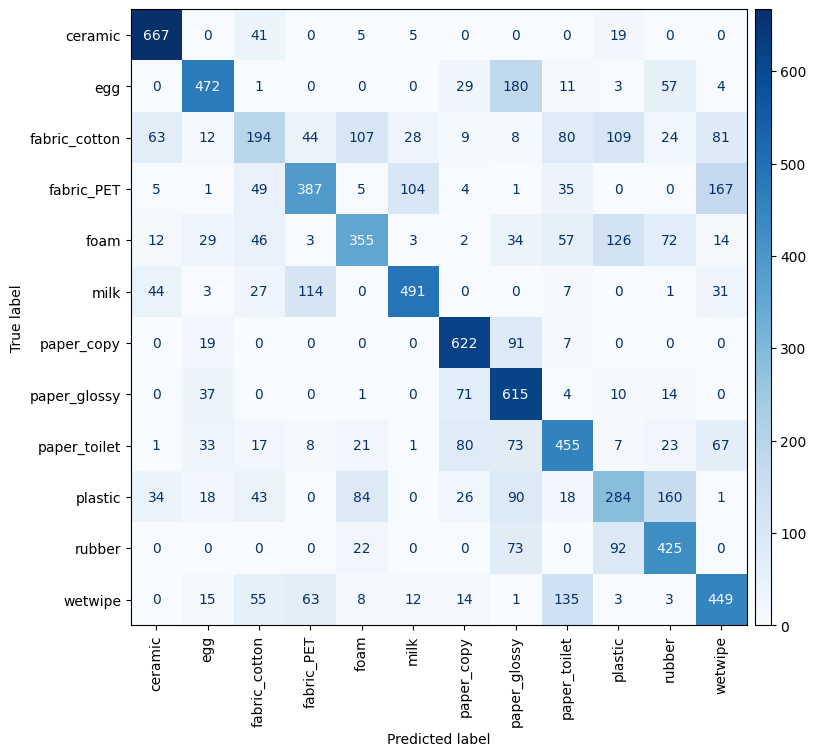

In [27]:
cm = sum(LDA_cm_list)
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

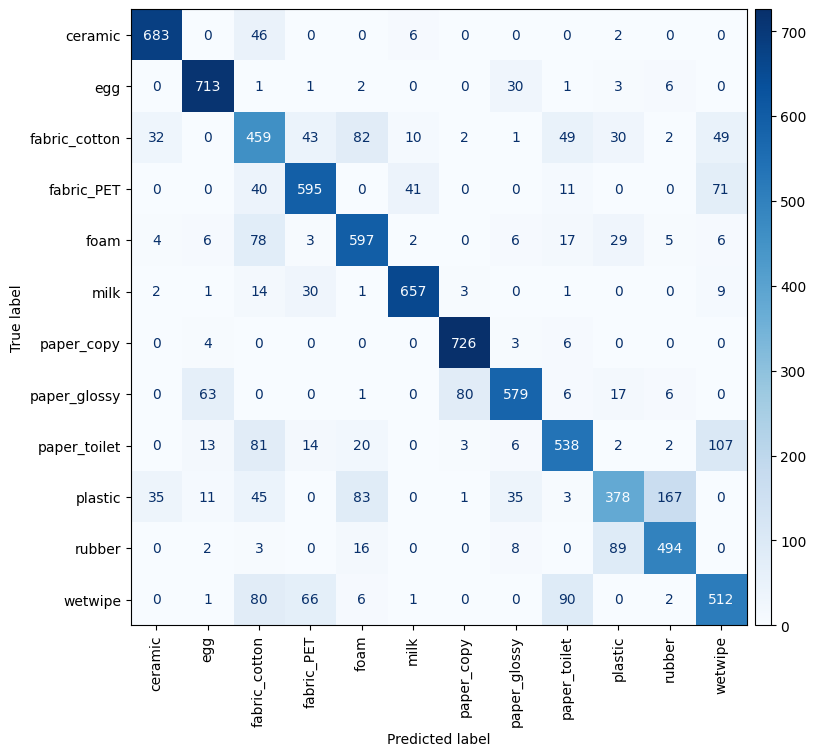

In [29]:
cm = sum(SVM_cm_list)
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

## Spectral Subsurface Scattering (Multispectral Point Patches, Max Normalized)

In [72]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Create the LDA model
lda = LinearDiscriminantAnalysis()

# Create the SVM classifier with an RBF kernel and 'nu' parameter set to 0.5
clf = NuSVC(kernel='rbf', nu=0.05)

# Create the PCA model to reduce dimensionality
pca = PCA(n_components=900)  # Set the number of components to retain

LDA_accuracy_list = []
LDA_cm_list = []
SVM_accuracy_list = []
SVM_cm_list = []

class_names = ['ceramic', 'egg', 'fabric_cotton', 'fabric_PET', 'foam', 'milk', 'paper_copy', 'paper_glossy', 'paper_toilet', 'plastic', 'rubber', 'wetwipe']
class_data_lists = [data_ceramic_list, data_egg_list, data_fabric_cotton_list, data_fabric_PET_list,
                    data_foam_list, data_milk_list, data_paper_copy_list, data_paper_glossy_list,
                    data_paper_toilet_list, data_plastic_list, data_rubber_list, data_wetwipe_list]

# for i in range(5):
for i in range(5):
    test_indices = [i, i + 5]
    train_indices = [j for j in range(10) if j not in test_indices]

    X_test = np.concatenate([data_list[idx] for data_list in class_data_lists for idx in test_indices])
    y_test = np.concatenate([np.full(data_list[idx].shape[0], class_idx) for class_idx, data_list in enumerate(class_data_lists) for idx in test_indices])

    X_train_list = []
    y_train_list = []

    for class_idx, data_list in enumerate(class_data_lists):
        rest_data = np.vstack([data_list[idx] for idx in train_indices])
        X_train_list.append(rest_data)
        y_train_list.append(np.full(rest_data.shape[0], class_idx))

    X_train = np.concatenate(X_train_list)
    y_train = np.concatenate(y_train_list)

    # Apply PCA to the training data
    pca.fit(X_train)
    X_train_reduced = pca.transform(X_train)

    # Fit the LDA model to the reduced training data
    lda.fit(X_train_reduced, y_train)

    # Apply PCA to the test data
    X_test_reduced = pca.transform(X_test)

    # Perform classification on the reduced test data
    predictions = lda.predict(X_test_reduced)

    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    LDA_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    LDA_cm_list.append(cm)

    # Fit the classifier to the reduced training data
    clf.fit(X_train_reduced, y_train)

    # Perform classification on the reduced test data
    predictions = clf.predict(X_test_reduced)
    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    SVM_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    SVM_cm_list.append(cm)


In [73]:
print("LDA accuracy: ", np.mean(LDA_accuracy_list))
LDA_accuracy_list

LDA accuracy:  0.7356035261973276


[0.7425687044307347,
 0.7998875772906127,
 0.8069977426636569,
 0.7029312288613303,
 0.6256323777403036]

In [74]:
print("SVM accuracy: ", np.mean(SVM_accuracy_list))
SVM_accuracy_list

SVM accuracy:  0.8024506248044052


[0.8171620863712844,
 0.8926363125351321,
 0.8414221218961625,
 0.8354002254791432,
 0.6256323777403036]

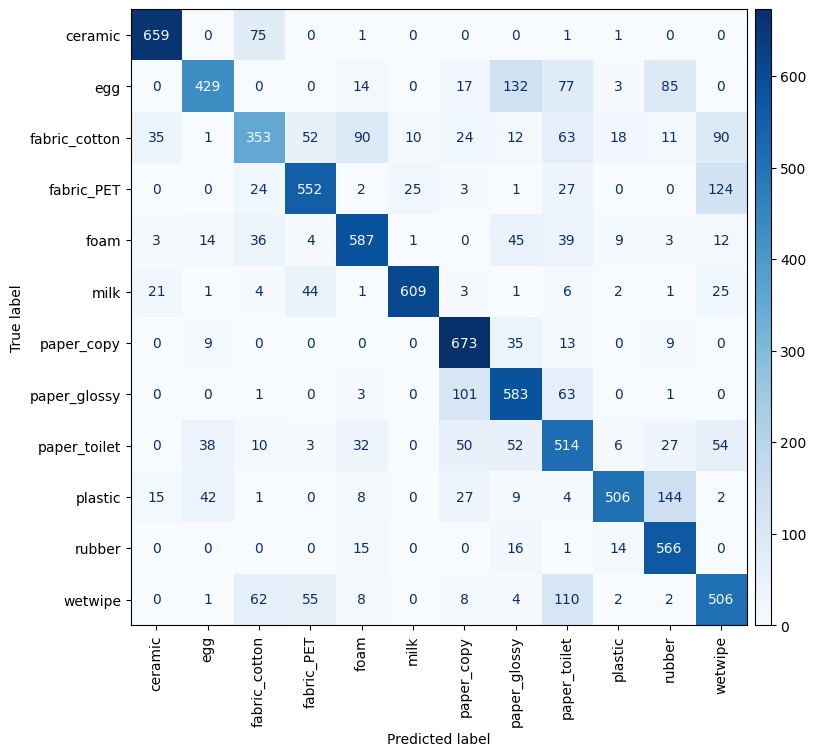

In [75]:
cm = sum(LDA_cm_list)
# cm = LDA_cm_list[2]
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

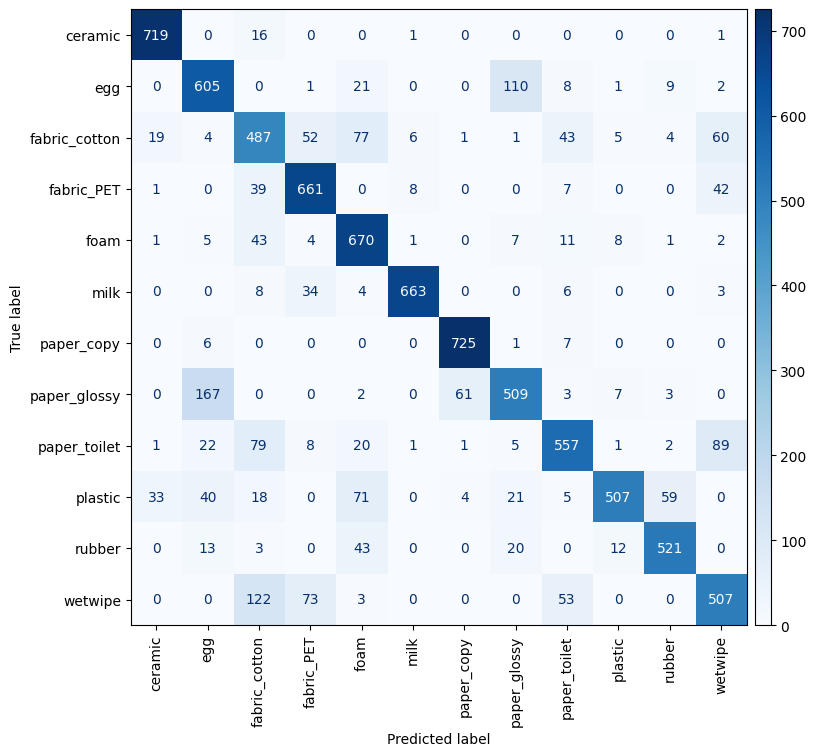

In [76]:
cm = sum(SVM_cm_list)
# cm = LDA_cm_list[2]
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

## W/O PCA Spectral Subsurface Scattering (Multispectral Point Patches, Max Normalized)

In [8]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Create the LDA model
lda = LinearDiscriminantAnalysis()

# Create the SVM classifier with an RBF kernel and 'nu' parameter set to 0.5
clf = NuSVC(kernel='rbf', nu=0.05)


LDA_accuracy_list = []
LDA_cm_list = []
SVM_accuracy_list = []
SVM_cm_list = []

class_names = ['ceramic', 'egg', 'fabric_cotton', 'fabric_PET', 'foam', 'milk', 'paper_copy', 'paper_glossy', 'paper_toilet', 'plastic', 'rubber', 'wetwipe']
class_data_lists = [data_ceramic_list, data_egg_list, data_fabric_cotton_list, data_fabric_PET_list,
                    data_foam_list, data_milk_list, data_paper_copy_list, data_paper_glossy_list,
                    data_paper_toilet_list, data_plastic_list, data_rubber_list, data_wetwipe_list]

# for i in range(5):
for i in range(5):
    test_indices = [i, i + 5]
    train_indices = [j for j in range(10) if j not in test_indices]

    X_test = np.concatenate([data_list[idx] for data_list in class_data_lists for idx in test_indices])
    y_test = np.concatenate([np.full(data_list[idx].shape[0], class_idx) for class_idx, data_list in enumerate(class_data_lists) for idx in test_indices])

    X_train_list = []
    y_train_list = []

    for class_idx, data_list in enumerate(class_data_lists):
        rest_data = np.vstack([data_list[idx] for idx in train_indices])
        X_train_list.append(rest_data)
        y_train_list.append(np.full(rest_data.shape[0], class_idx))

    X_train = np.concatenate(X_train_list)
    y_train = np.concatenate(y_train_list)

    # Fit the LDA model to the reduced training data
    lda.fit(X_train, y_train)

    # Perform classification on the reduced test data
    predictions = lda.predict(X_test)

    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    LDA_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    LDA_cm_list.append(cm)

    # Fit the classifier to the reduced training data
    clf.fit(X_train, y_train)

    # Perform classification on the reduced test data
    predictions = clf.predict(X_test)
    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    SVM_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    SVM_cm_list.append(cm)


In [9]:
print("LDA accuracy: ", np.mean(LDA_accuracy_list))
LDA_accuracy_list

LDA accuracy:  0.5961664548333904


[0.6242288278182838,
 0.6582349634626194,
 0.6585778781038375,
 0.5574971815107103,
 0.4822934232715008]

In [10]:
print("SVM accuracy: ", np.mean(SVM_accuracy_list))
SVM_accuracy_list

SVM accuracy:  0.8033563624158241


[0.820527201346046,
 0.8920741989881956,
 0.8538374717832957,
 0.8320180383314544,
 0.6183249016301293]

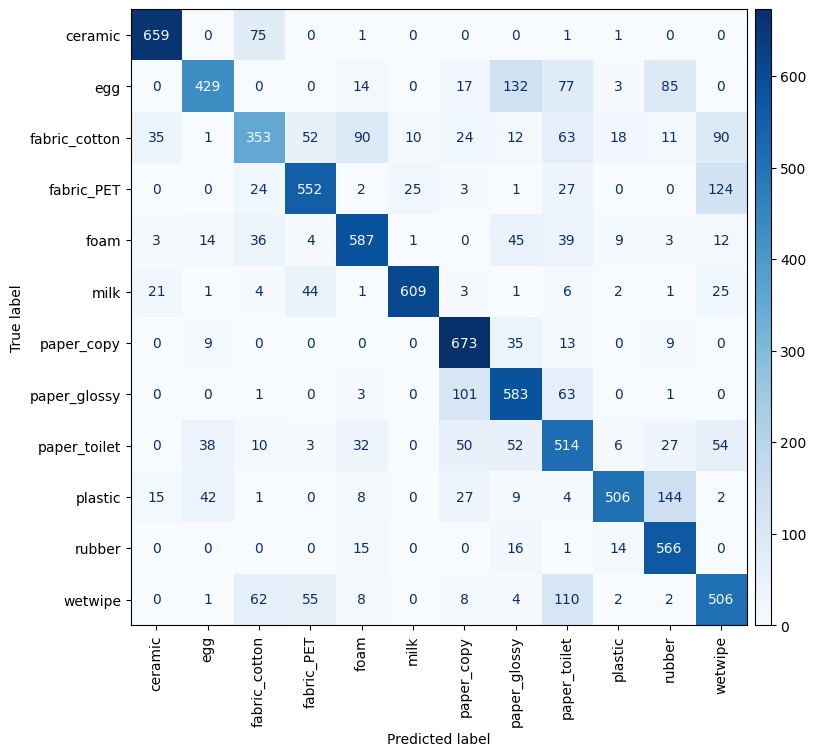

In [ ]:
cm = sum(LDA_cm_list)
# cm = LDA_cm_list[2]
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

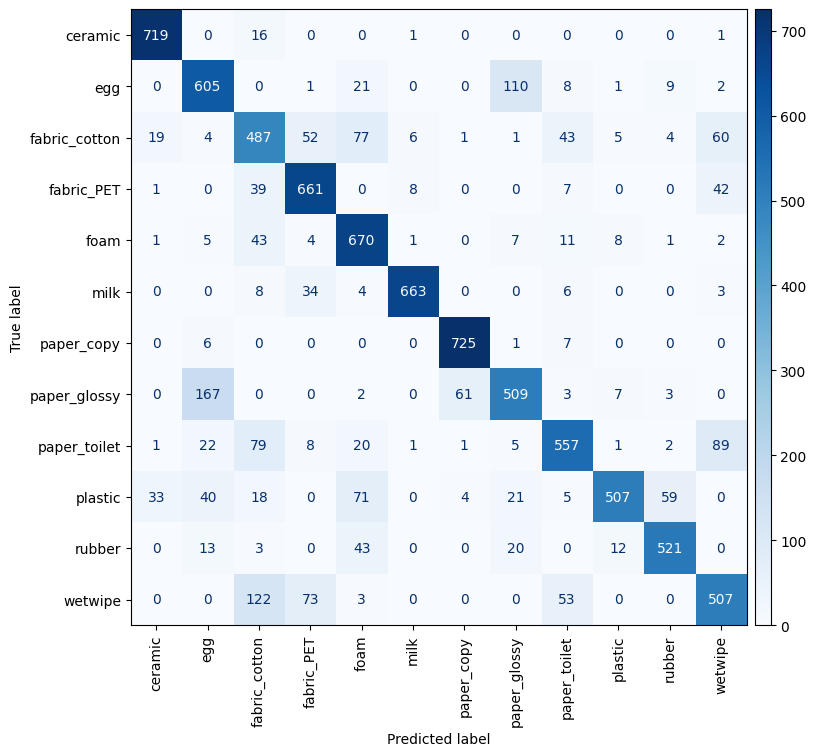

In [ ]:
cm = sum(SVM_cm_list)
# cm = LDA_cm_list[2]
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

## ESnorm

In [21]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Create the LDA model
lda = LinearDiscriminantAnalysis()

# Create the SVM classifier with an RBF kernel and 'nu' parameter set to 0.5
clf = NuSVC(kernel='rbf', nu=0.05)

# Create the PCA model to reduce dimensionality
pca = PCA(n_components=900)  # Set the number of components to retain

LDA_accuracy_list = []
LDA_cm_list = []
SVM_accuracy_list = []
SVM_cm_list = []

class_names = ['ceramic', 'egg', 'fabric_cotton', 'fabric_PET', 'foam', 'milk', 'paper_copy', 'paper_glossy', 'paper_toilet', 'plastic', 'rubber', 'wetwipe']
class_data_lists = [ESnorm_data_ceramic_list, ESnorm_data_egg_list, ESnorm_data_fabric_cotton_list, ESnorm_data_fabric_PET_list,
                    ESnorm_data_foam_list, ESnorm_data_milk_list, ESnorm_data_paper_copy_list, ESnorm_data_paper_glossy_list,
                    ESnorm_data_paper_toilet_list, ESnorm_data_plastic_list, ESnorm_data_rubber_list, ESnorm_data_wetwipe_list]

# for i in range(5):
for i in range(5):
    test_indices = [i, i + 5]
    train_indices = [j for j in range(10) if j not in test_indices]

    X_test = np.concatenate([data_list[idx] for data_list in class_data_lists for idx in test_indices])
    y_test = np.concatenate([np.full(data_list[idx].shape[0], class_idx) for class_idx, data_list in enumerate(class_data_lists) for idx in test_indices])

    X_train_list = []
    y_train_list = []

    for class_idx, data_list in enumerate(class_data_lists):
        rest_data = np.vstack([data_list[idx] for idx in train_indices])
        X_train_list.append(rest_data)
        y_train_list.append(np.full(rest_data.shape[0], class_idx))

    X_train = np.concatenate(X_train_list)
    y_train = np.concatenate(y_train_list)

    # Apply PCA to the training data
    pca.fit(X_train)
    X_train_reduced = pca.transform(X_train)

    # Fit the LDA model to the reduced training data
    lda.fit(X_train_reduced, y_train)

    # Apply PCA to the test data
    X_test_reduced = pca.transform(X_test)

    # Perform classification on the reduced test data
    predictions = lda.predict(X_test_reduced)

    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    LDA_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    LDA_cm_list.append(cm)

    # Fit the classifier to the reduced training data
    clf.fit(X_train_reduced, y_train)

    # Perform classification on the reduced test data
    predictions = clf.predict(X_test_reduced)
    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    SVM_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    SVM_cm_list.append(cm)


In [22]:
print("LDA accuracy: ", np.mean(LDA_accuracy_list))
LDA_accuracy_list

LDA accuracy:  0.7427750898967249


[0.7666853617498598,
 0.8257448004496908,
 0.7691873589164786,
 0.7333709131905298,
 0.6188870151770658]

In [23]:
print("SVM accuracy: ", np.mean(SVM_accuracy_list))
SVM_accuracy_list

SVM accuracy:  0.823011485514597


[0.8177229388670779,
 0.8976953344575604,
 0.8278781038374717,
 0.8325817361894025,
 0.7391793142214728]

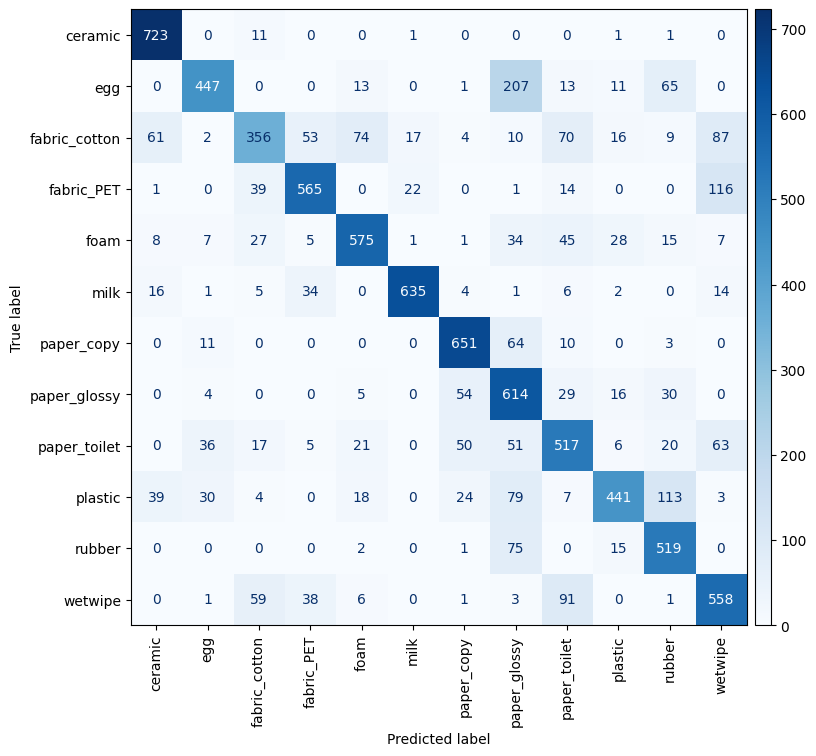

In [24]:
cm = sum(LDA_cm_list)
# cm = LDA_cm_list[2]
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

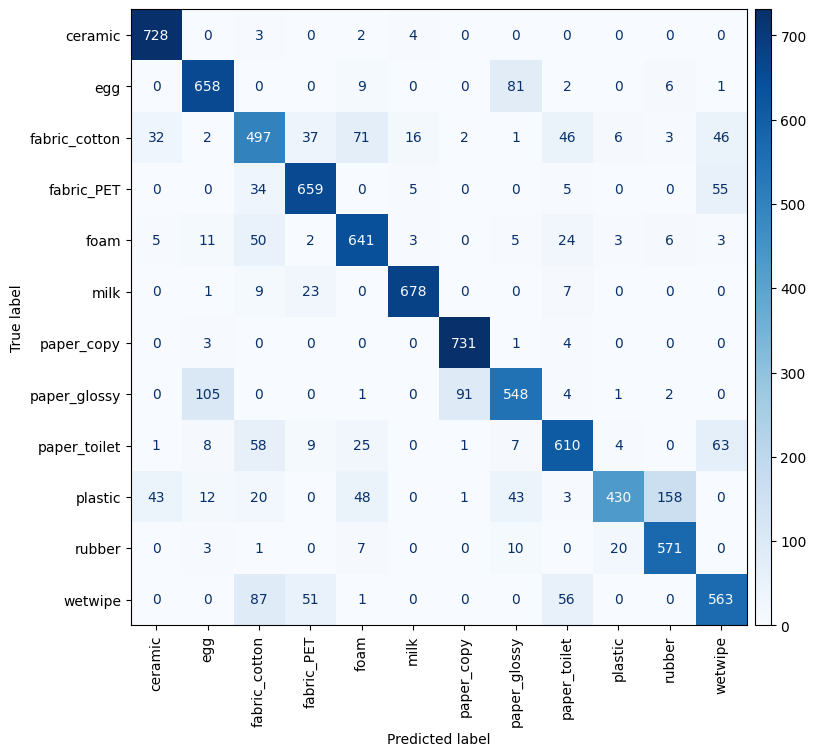

In [25]:
cm = sum(SVM_cm_list)
# cm = LDA_cm_list[2]
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

# Train on scan1 and test on scan2

## Train on whole scan 1 and test on hwole scan2

In [24]:
import numpy as np

# Prepare training dataset
train_data = [data_ceramic_list[0:5], data_egg_list[0:5], data_fabric_cotton_list[0:5], data_fabric_PET_list[0:5],
              data_foam_list[0:5], data_milk_list[0:5], data_paper_copy_list[0:5], data_paper_glossy_list[0:5],
              data_paper_toilet_list[0:5], data_plastic_list[0:5], data_rubber_list[0:5], data_wetwipe_list[0:5]]
# train_data = [ESnorm_data_ceramic_list[0:5], ESnorm_data_egg_list[0:5], ESnorm_data_fabric_cotton_list[0:5], ESnorm_data_fabric_PET_list[0:5],
#               ESnorm_data_foam_list[0:5], ESnorm_data_milk_list[0:5], ESnorm_data_paper_copy_list[0:5], ESnorm_data_paper_glossy_list[0:5],
#               ESnorm_data_paper_toilet_list[0:5], ESnorm_data_plastic_list[0:5], ESnorm_data_rubber_list[0:5], ESnorm_data_wetwipe_list[0:5]]

X_train = np.concatenate([np.concatenate(data) for data in train_data])

# Prepare testing dataset
test_data = [data_ceramic_list[5:], data_egg_list[5:], data_fabric_cotton_list[5:], data_fabric_PET_list[5:],
             data_foam_list[5:], data_milk_list[5:], data_paper_copy_list[5:], data_paper_glossy_list[5:],
             data_paper_toilet_list[5:], data_plastic_list[5:], data_rubber_list[5:], data_wetwipe_list[5:]]

# test_data = [ESnorm_data_ceramic_list[5:], ESnorm_data_egg_list[5:], ESnorm_data_fabric_cotton_list[5:], ESnorm_data_fabric_PET_list[5:],
#              ESnorm_data_foam_list[5:], ESnorm_data_milk_list[5:], ESnorm_data_paper_copy_list[5:], ESnorm_data_paper_glossy_list[5:],
#              ESnorm_data_paper_toilet_list[5:], ESnorm_data_plastic_list[5:], ESnorm_data_rubber_list[5:], ESnorm_data_wetwipe_list[5:]]

X_test = np.concatenate([np.concatenate(data) for data in test_data])

# Prepare training labels
train_labels = [np.full(sum([arr.shape[0] for arr in data]), i) for i, data in enumerate(train_data)]
y_train = np.concatenate(train_labels)

# Prepare testing labels
test_labels = [np.full(sum([arr.shape[0] for arr in data]), i) for i, data in enumerate(test_data)]
y_test = np.concatenate(test_labels)


In [25]:
# import numpy as np

# # Prepare training dataset
# test_data = [data_ceramic_list[0:5], data_egg_list[0:5], data_fabric_cotton_list[0:5], data_fabric_PET_list[0:5],
#               data_foam_list[0:5], data_milk_list[0:5], data_paper_copy_list[0:5], data_paper_glossy_list[0:5],
#               data_paper_toilet_list[0:5], data_plastic_list[0:5], data_rubber_list[0:5], data_wetwipe_list[0:5]]
# X_test = np.concatenate([np.concatenate(data) for data in test_data])

# # Prepare testing dataset
# train_data = [data_ceramic_list[5:], data_egg_list[5:], data_fabric_cotton_list[5:], data_fabric_PET_list[5:],
#              data_foam_list[5:], data_milk_list[5:], data_paper_copy_list[5:], data_paper_glossy_list[5:],
#              data_paper_toilet_list[5:], data_plastic_list[5:], data_rubber_list[5:], data_wetwipe_list[5:]]
# X_train = np.concatenate([np.concatenate(data) for data in train_data])

# # Prepare training labels
# train_labels = [np.full(sum([arr.shape[0] for arr in data]), i) for i, data in enumerate(train_data)]
# y_train = np.concatenate(train_labels)

# # Prepare testing labels
# test_labels = [np.full(sum([arr.shape[0] for arr in data]), i) for i, data in enumerate(test_data)]
# y_test = np.concatenate(test_labels)


In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4449, 14400)
(4449,)
(4438, 14400)
(4438,)


In [27]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import NuSVC

# Create the LDA model
lda = LinearDiscriminantAnalysis()

# Create the SVM classifier with an RBF kernel and 'nu' parameter set to 0.5
clf = NuSVC(kernel='rbf', nu=0.05)

# Create the PCA model to reduce dimensionality
pca = PCA(n_components=900)  # Set the number of components to retain

LDA_accuracy_list = []
LDA_cm_list = []
SVM_accuracy_list = []
SVM_cm_list = []

# Apply PCA to the training data
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)

# Fit the LDA model to the reduced training data
lda.fit(X_train_reduced, y_train)

# Apply PCA to the test data
X_test_reduced = pca.transform(X_test)

# Perform classification on the reduced test data
predictions = lda.predict(X_test_reduced)

# Measure the accuracy on the test data
accuracy = accuracy_score(y_test, predictions)
LDA_accuracy_list.append(accuracy)
# Create the confusion matrix
cm = confusion_matrix(y_test, predictions)
LDA_cm_list.append(cm)

# Fit the classifier to the reduced training data
clf.fit(X_train_reduced, y_train)

# Perform classification on the reduced test data
predictions = clf.predict(X_test_reduced)
# Measure the accuracy on the test data
accuracy = accuracy_score(y_test, predictions)
SVM_accuracy_list.append(accuracy)
# Create the confusion matrix
cm = confusion_matrix(y_test, predictions)
SVM_cm_list.append(cm)


In [28]:
print("LDA accuracy: ", np.mean(LDA_accuracy_list))
LDA_accuracy_list

LDA accuracy:  0.7692654348805769


[0.7692654348805769]

In [29]:
print("SVM accuracy: ", np.mean(SVM_accuracy_list))
SVM_accuracy_list

SVM accuracy:  0.8138801261829653


[0.8138801261829653]

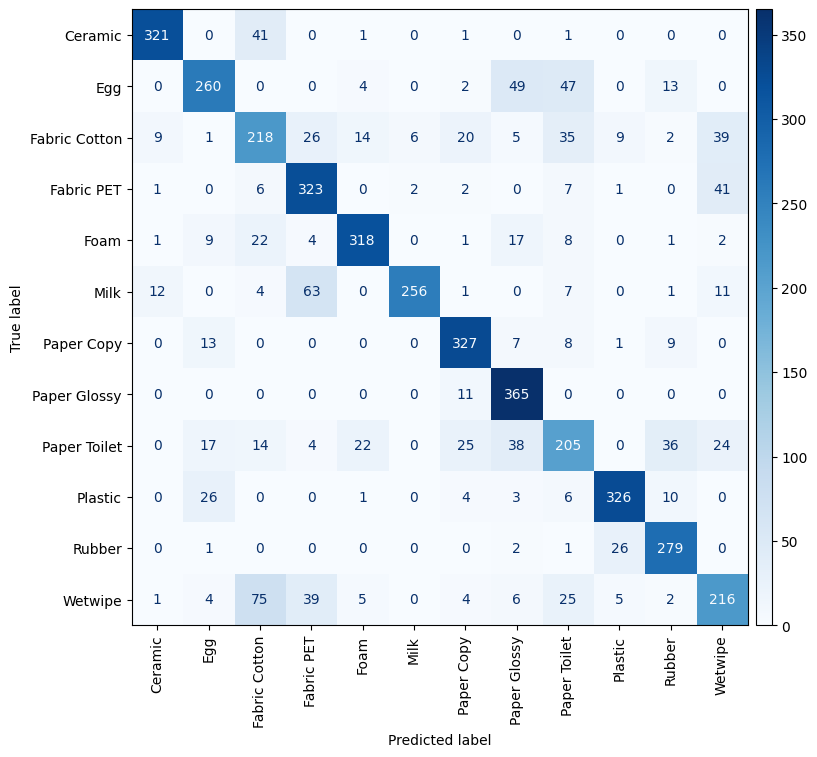

In [30]:
cm = sum(LDA_cm_list)
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

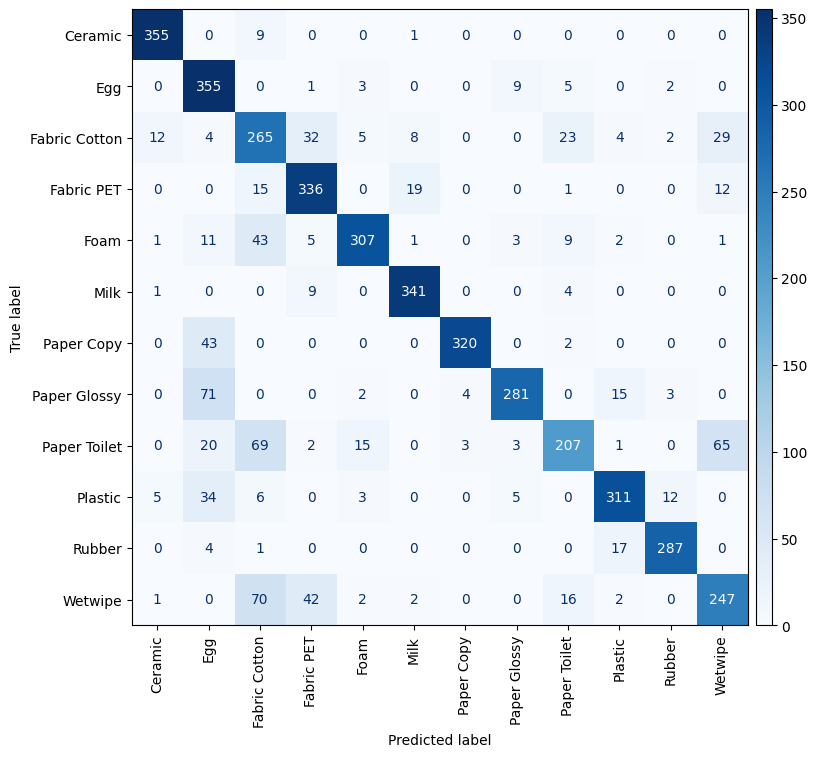

In [31]:
cm = sum(SVM_cm_list)
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

## Train and test on each fold in different scan group

### SSS

In [77]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Create the LDA model
lda = LinearDiscriminantAnalysis()

# Create the SVM classifier with an RBF kernel and 'nu' parameter set to 0.5
clf = NuSVC(kernel='rbf', nu=0.05)

LDA_accuracy_list = []
LDA_cm_list = []
SVM_accuracy_list = []
SVM_cm_list = []

class_names = ['ceramic', 'egg', 'fabric_cotton', 'fabric_PET', 'foam', 'milk', 'paper_copy', 'paper_glossy', 'paper_toilet', 'plastic', 'rubber', 'wetwipe']
class_data_lists = [data_ceramic_list, data_egg_list, data_fabric_cotton_list, data_fabric_PET_list,
                    data_foam_list, data_milk_list, data_paper_copy_list, data_paper_glossy_list,
                    data_paper_toilet_list, data_plastic_list, data_rubber_list, data_wetwipe_list]

for i in range(5):
# for i in range(5, 10):
    fold_gap = 1
    X_test = np.concatenate([data_list[i+fold_gap] for data_list in class_data_lists])
    y_test = np.concatenate([np.full(data_list[i+fold_gap].shape[0], class_idx) for class_idx, data_list in enumerate(class_data_lists)])

    # X_train_list = []
    # y_train_list = []

    # for class_idx, data_list in enumerate(class_data_lists):
    #     rest_data = np.vstack(data_list[:i] + data_list[i+1:])
    #     X_train_list.append(rest_data)
    #     y_train_list.append(np.full(rest_data.shape[0], class_idx))

    # X_train = np.concatenate(X_train_list)
    # y_train = np.concatenate(y_train_list)

    X_train = np.concatenate([data_list[i] for data_list in class_data_lists])
    y_train = np.concatenate([np.full(data_list[i].shape[0], class_idx) for class_idx, data_list in enumerate(class_data_lists)])

    # Fit the LDA model to the training data
    lda.fit(X_train, y_train)

    # Perform classification on the test data
    predictions = lda.predict(X_test)

    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    LDA_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    LDA_cm_list.append(cm)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Perform classification on the test data
    predictions = clf.predict(X_test)
    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    SVM_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    SVM_cm_list.append(cm)


In [78]:
print("LDA accuracy: ", np.mean(LDA_accuracy_list))
LDA_accuracy_list

LDA accuracy:  0.22249610339056486


[0.1713961407491487,
 0.053156146179401995,
 0.2842696629213483,
 0.2606741573033708,
 0.3429844097995546]

In [79]:
print("SVM accuracy: ", np.mean(SVM_accuracy_list))
SVM_accuracy_list

SVM accuracy:  0.4219261070268211


[0.3961407491486947,
 0.327796234772979,
 0.4696629213483146,
 0.449438202247191,
 0.4665924276169265]

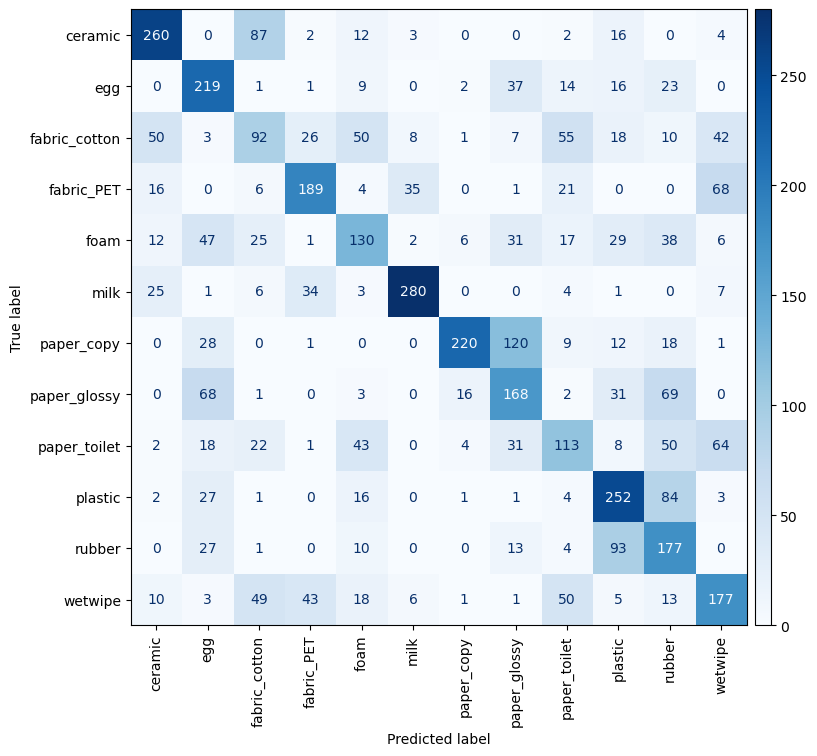

In [ ]:
cm = sum(LDA_cm_list)
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

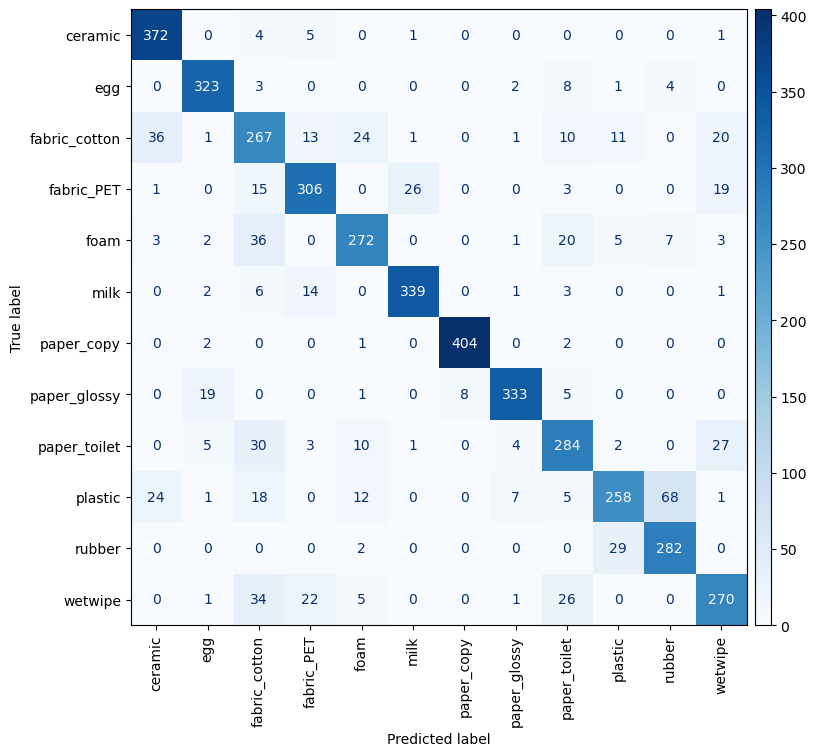

In [ ]:
cm = sum(SVM_cm_list)
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

### AS

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Create the LDA model
lda = LinearDiscriminantAnalysis()

# Create the SVM classifier with an RBF kernel and 'nu' parameter set to 0.5
clf = NuSVC(kernel='rbf', nu=0.05)

LDA_accuracy_list = []
LDA_cm_list = []
SVM_accuracy_list = []
SVM_cm_list = []

class_names = ['ceramic', 'egg', 'fabric_cotton', 'fabric_PET', 'foam', 'milk', 'paper_copy', 'paper_glossy', 'paper_toilet', 'plastic', 'rubber', 'wetwipe']
class_data_lists = [pixelSum_data_ceramic_list, pixelSum_data_egg_list, pixelSum_data_fabric_cotton_list, pixelSum_data_fabric_PET_list,
                    pixelSum_data_foam_list, pixelSum_data_milk_list, pixelSum_data_paper_copy_list, pixelSum_data_paper_glossy_list,
                    pixelSum_data_paper_toilet_list, pixelSum_data_plastic_list, pixelSum_data_rubber_list, pixelSum_data_wetwipe_list]

for i in range(5):
# for i in range(5, 10):
    fold_gap = 2
    X_test = np.concatenate([data_list[i+fold_gap] for data_list in class_data_lists])
    y_test = np.concatenate([np.full(data_list[i+fold_gap].shape[0], class_idx) for class_idx, data_list in enumerate(class_data_lists)])

    # X_train_list = []
    # y_train_list = []

    # for class_idx, data_list in enumerate(class_data_lists):
    #     rest_data = np.vstack(data_list[:i] + data_list[i+1:])
    #     X_train_list.append(rest_data)
    #     y_train_list.append(np.full(rest_data.shape[0], class_idx))

    # X_train = np.concatenate(X_train_list)
    # y_train = np.concatenate(y_train_list)

    X_train = np.concatenate([data_list[i] for data_list in class_data_lists])
    y_train = np.concatenate([np.full(data_list[i].shape[0], class_idx) for class_idx, data_list in enumerate(class_data_lists)])

    # Fit the LDA model to the training data
    lda.fit(X_train, y_train)

    # Perform classification on the test data
    predictions = lda.predict(X_test)

    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    LDA_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    LDA_cm_list.append(cm)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Perform classification on the test data
    predictions = clf.predict(X_test)
    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    SVM_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    SVM_cm_list.append(cm)


In [21]:
print("LDA accuracy: ", np.mean(LDA_accuracy_list))
LDA_accuracy_list

LDA accuracy:  0.2377106019069865


[0.2646755921730175,
 0.25654450261780104,
 0.2031413612565445,
 0.22797927461139897,
 0.23621227887617066]

In [22]:
print("SVM accuracy: ", np.mean(SVM_accuracy_list))
SVM_accuracy_list

SVM accuracy:  0.5928838710141923


[0.5664263645726055,
 0.6712041884816754,
 0.5916230366492147,
 0.5264248704663212,
 0.6087408949011447]

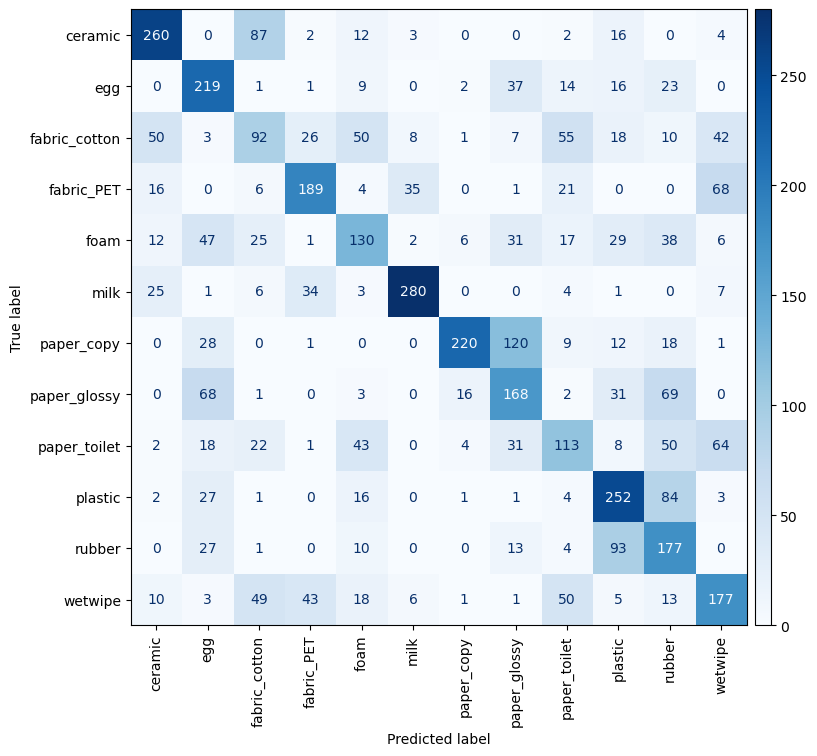

In [ ]:
cm = sum(LDA_cm_list)
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

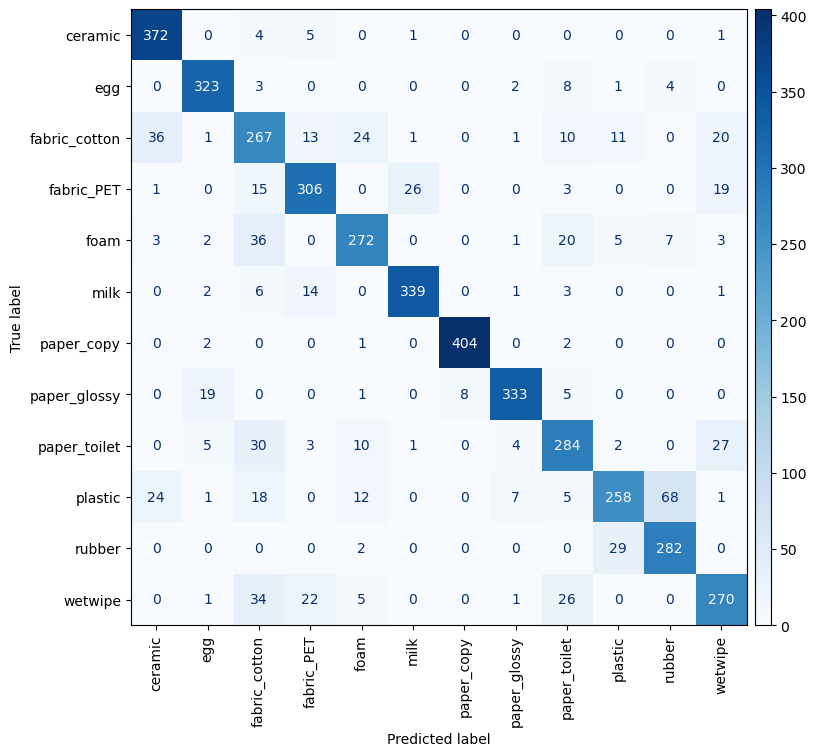

In [ ]:
cm = sum(SVM_cm_list)
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

### MA

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Create the LDA model
lda = LinearDiscriminantAnalysis()

# Create the SVM classifier with an RBF kernel and 'nu' parameter set to 0.5
clf = NuSVC(kernel='rbf', nu=0.05)

LDA_accuracy_list = []
LDA_cm_list = []
SVM_accuracy_list = []
SVM_cm_list = []

class_names = ['ceramic', 'egg', 'fabric_cotton', 'fabric_PET', 'foam', 'milk', 'paper_copy', 'paper_glossy', 'paper_toilet', 'plastic', 'rubber', 'wetwipe']
class_data_lists = [patchSum_data_ceramic_list, patchSum_data_egg_list, patchSum_data_fabric_cotton_list, patchSum_data_fabric_PET_list,
                    patchSum_data_foam_list, patchSum_data_milk_list, patchSum_data_paper_copy_list, patchSum_data_paper_glossy_list,
                    patchSum_data_paper_toilet_list, patchSum_data_plastic_list, patchSum_data_rubber_list, patchSum_data_wetwipe_list]

for i in range(5):
# for i in range(5, 10):
    fold_gap = 5
    X_test = np.concatenate([data_list[i+fold_gap] for data_list in class_data_lists])
    y_test = np.concatenate([np.full(data_list[i+fold_gap].shape[0], class_idx) for class_idx, data_list in enumerate(class_data_lists)])

    # X_train_list = []
    # y_train_list = []

    # for class_idx, data_list in enumerate(class_data_lists):
    #     rest_data = np.vstack(data_list[:i] + data_list[i+1:])
    #     X_train_list.append(rest_data)
    #     y_train_list.append(np.full(rest_data.shape[0], class_idx))

    # X_train = np.concatenate(X_train_list)
    # y_train = np.concatenate(y_train_list)

    X_train = np.concatenate([data_list[i] for data_list in class_data_lists])
    y_train = np.concatenate([np.full(data_list[i].shape[0], class_idx) for class_idx, data_list in enumerate(class_data_lists)])

    # Fit the LDA model to the training data
    lda.fit(X_train, y_train)

    # Perform classification on the test data
    predictions = lda.predict(X_test)

    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    LDA_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    LDA_cm_list.append(cm)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Perform classification on the test data
    predictions = clf.predict(X_test)
    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    SVM_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    SVM_cm_list.append(cm)


In [43]:
print("LDA accuracy: ", np.mean(LDA_accuracy_list))
LDA_accuracy_list

LDA accuracy:  0.07004986536837143


[0.10984455958549223,
 0.09261186264308012,
 0.10835913312693499,
 0.03943377148634985,
 0.0]

In [44]:
print("SVM accuracy: ", np.mean(SVM_accuracy_list))
SVM_accuracy_list

SVM accuracy:  0.10379595348789668


[0.11606217616580311,
 0.1383975026014568,
 0.13828689370485037,
 0.0980788675429727,
 0.028154327424400417]

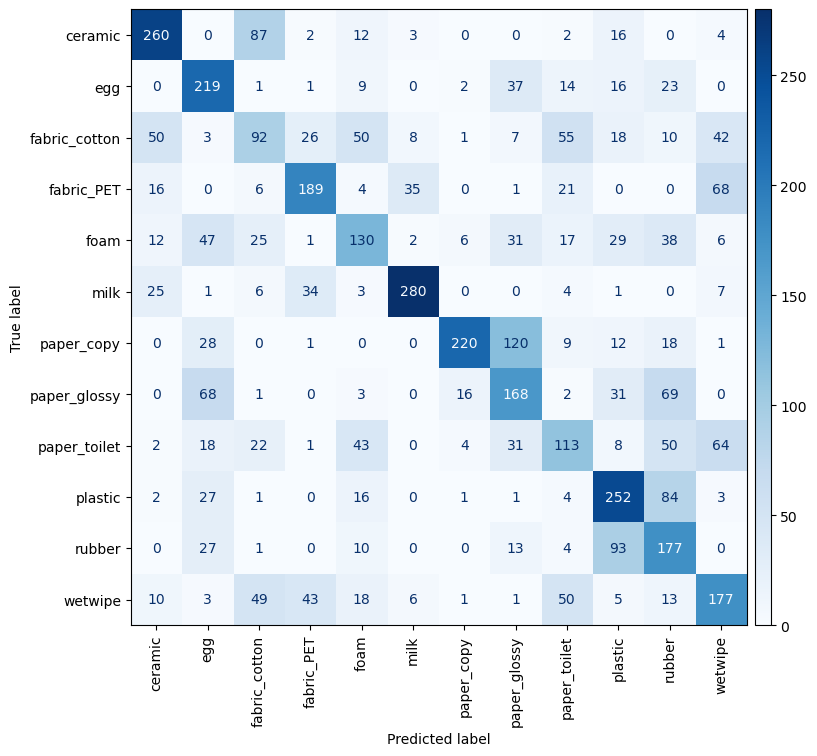

In [ ]:
cm = sum(LDA_cm_list)
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

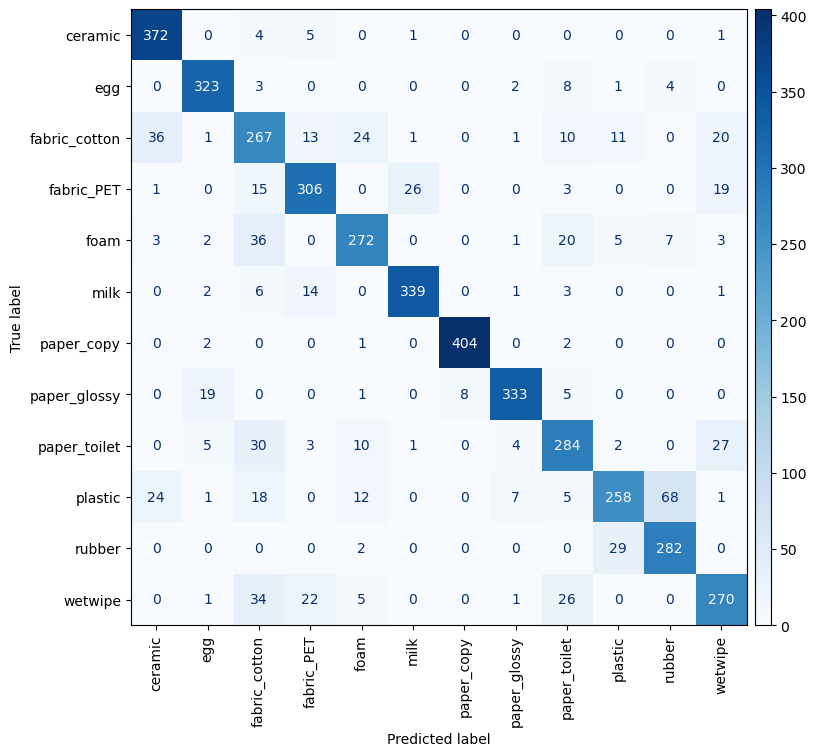

In [ ]:
cm = sum(SVM_cm_list)
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()